# Part 3. Benchmarking Model

## Importing libraries and setting global variables

In [1]:
# Import usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

## Importing datasets

In [2]:
#Select dataset to read
# Select 'train' to read train.csv
# Select 'test' to read test.csv

status = 'train'

if status == 'train':
    df = pd.read_csv('../datasets/train_cleaned.csv')
elif status == 'test':
    df = pd.read_csv('../datasets/test_cleaned.csv')
else:
    print(f"Select the correct dataset")

In [3]:
df.shape

(2092, 60)

In [4]:
# View head
df.head(5)

,ms_zoning,lot_frontage,street,lot_shape,lot_contour,utilities,lot_config,lot_slope,neighborhood,condition_1,...,sale_price,has_2nd_floor_sf,total_sf,has_basement_sf,total_bath,has_open_porch,has_fireplace,has_wood_deck,log_sale_price,log_lot_area
0,Res,80.0,1.0,1.0,1.0,AllPub,Corner,1.0,SawyerW,N,...,159000,0,2436.0,1,1.5,1,0,0,11.976659,9.170039
1,Res,90.0,1.0,0.0,1.0,AllPub,CulDSac,1.0,SawyerW,N,...,271900,0,4354.0,1,2.0,1,1,1,12.513190,9.594514
2,Res,60.0,1.0,0.0,1.0,NoSeWa,CulDSac,1.0,Timber,N,...,137500,0,2163.0,1,1.5,1,1,0,11.831379,9.573246
3,Res,48.0,1.0,1.0,1.0,AllPub,Inside,1.0,NridgHt,N,...,248500,0,2907.0,1,2.0,1,1,1,12.423198,8.775240
4,Res,61.0,1.0,0.0,1.0,AllPub,Inside,1.0,Gilbert,R,...,167000,1,1758.0,1,2.5,0,0,0,12.025749,9.183380


## Selecting X and Y

Selecting Columns (Benchmarking with top 5 correlated features after cleaning)

__Selected Top 5 Correlated Features:__
1. Overall Quality
    - Overall quality of the house scaling from 1-10
    - Houses that has great overall quality tends to sell more expensively
2. Total Surface Area: total square footage of the house
    - Larger houses tends to sell more expensively by default 
3. Garage Cars: number of cars the garage can hold
    - The more cars a garage can hold, the larger the garage is
    - Prices will incease with garage size
4. Total Bath: number of bathrooms in the house
    - Total number of bathrooms, generally has the same effect as square footage
5. Year Built: year that the house was built
    - The year that the house was built has some effect on the prices
    - Newer houses are more expensive from costing more as well as generally
    in better condition by default

In [7]:
# Selecting all numerical columns
num_cols = list(df.corr()['log_sale_price'].sort_values(ascending=False).index)[:7]

In [8]:
# Training
X = df[num_cols].drop(columns=['sale_price','log_sale_price'])
y = df['sale_price']

# Benchmarking model

#### Create function to run linear regression


======== Linear Model ========

train r2: 0.8303
test_r2: 0.8396
cross validation score: [0.8359 0.8211 0.8376 0.8262 0.8209]
train rmse: 32036.88
test rmse: 30868.76


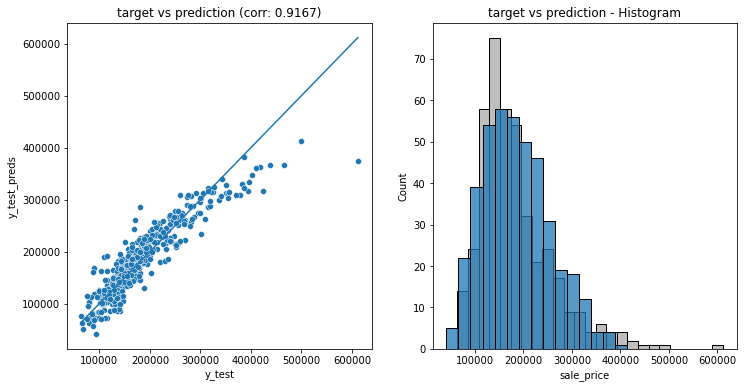

In [12]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=42)

# instantiate and fit the model
lr = LinearRegression() 
lr.fit(X_train,y_train)

# create predictions
y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

# train/test R^2 score
train_r2 = lr.score(X_train,y_train)
test_r2 = lr.score(X_test,y_test)

# cross validation score
mean_cross_val = cross_val_score(lr, X_train, y_train)

# RMSE calculation
rmse_train = round(metrics.mean_squared_error(y_train,
                                              y_train_preds,
                                              squared=False),2)
rmse_test = round(metrics.mean_squared_error(y_test,
                                             y_test_preds,
                                             squared=False),2)

# print results
print()
print(" Linear Model ".center(30, "="))
print()
print(f"train r2: {train_r2.round(4)}")
print(f"test_r2: {test_r2.round(4)}")
print(f"cross validation score: {mean_cross_val.round(4)}")
print(f"train rmse: {rmse_train}")
print(f"test rmse: {rmse_test}")

# generate plot
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# calculate correlation
cor = np.corrcoef(y_test,y_test_preds)

# plot 1 (left) - scatter plot of y_test vs y_test_preds
# plots
plot1 = sns.scatterplot(ax=axes[0],x=y_test,y=y_test_preds)
sns.lineplot(ax=axes[0],x=y_test,y=y_test)
# style
plot1.set_xlabel('y_test')
plot1.set_ylabel('y_test_preds')
plot1.set_title(f"target vs prediction (corr: {cor[0][1].round(4)})")

# plot 2 (right) - histogram y_test vs y_test_preds
# plots
plot2 = sns.histplot(ax=axes[1],x=y_test,color='grey',alpha=0.5)
plot2 = sns.histplot(ax=axes[1],x=y_test_preds)
# style
plot2.set_xlabel('sale_price')
plot2.set_title(f"target vs prediction - Histogram");

__Interpretation:__
- The features that we've cleaned up has performed well without overfitting
- THe R2 scores of training and testing datasets were very similar (only 0.01 off)
- However, we are not predicting very well around the high prices
- Moving forward, RMSE for benchmarking will be 30,429

----